# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# helper function to print in matplotlib

def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow((img[:,:,::-1]))

## Contours

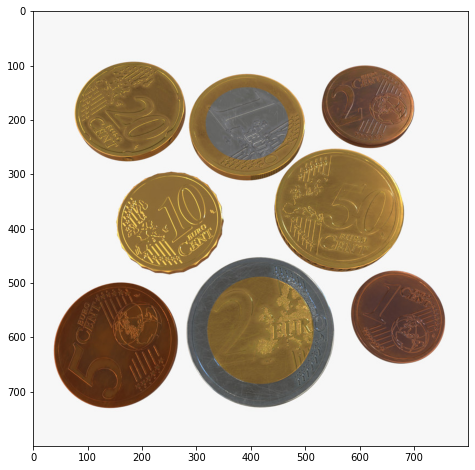

In [3]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

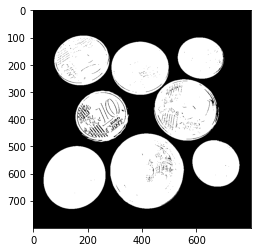

In [4]:
# make a copy of the original image
coins_copy = color_coins.copy()

# convert to grayscale
gray_coins = cv2.cvtColor(coins_copy, cv2.COLOR_BGR2GRAY)

# apply threshold
ret, th = cv2.threshold(gray_coins, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(th, cmap='gray')

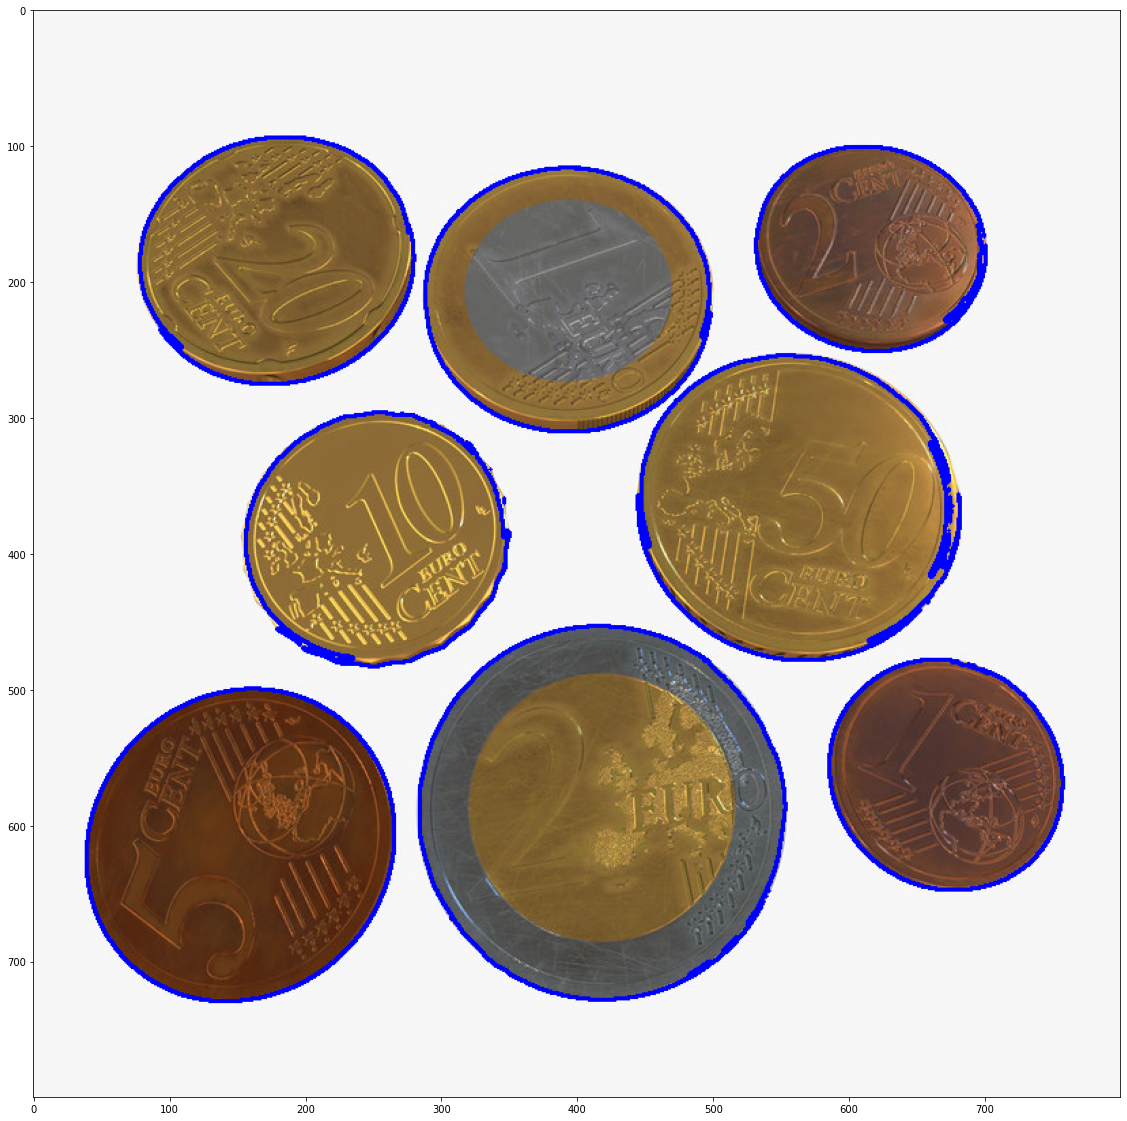

In [5]:
# find contours for the image
coin_cont, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw contours on the copy of the images
coin_copy_2 = rgb_coins.copy()

cv2.drawContours(coin_copy_2, coin_cont, -1, (0,0,255), 2)

plt.figure(figsize=(20,20))
plt.imshow(coin_copy_2)

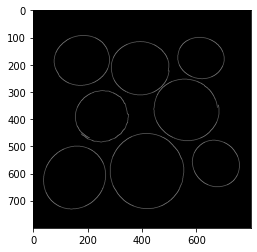

In [152]:
# Apply some gaussian blur to it (try differente size kernels)

coin_blur = cv2.GaussianBlur(gray_coins, (7,7), 0)

# Apply Canny to find edges and display the image 

coin_canny = cv2.Canny(coin_blur, 100, 400)
plt.imshow(coin_canny, cmap='gray')

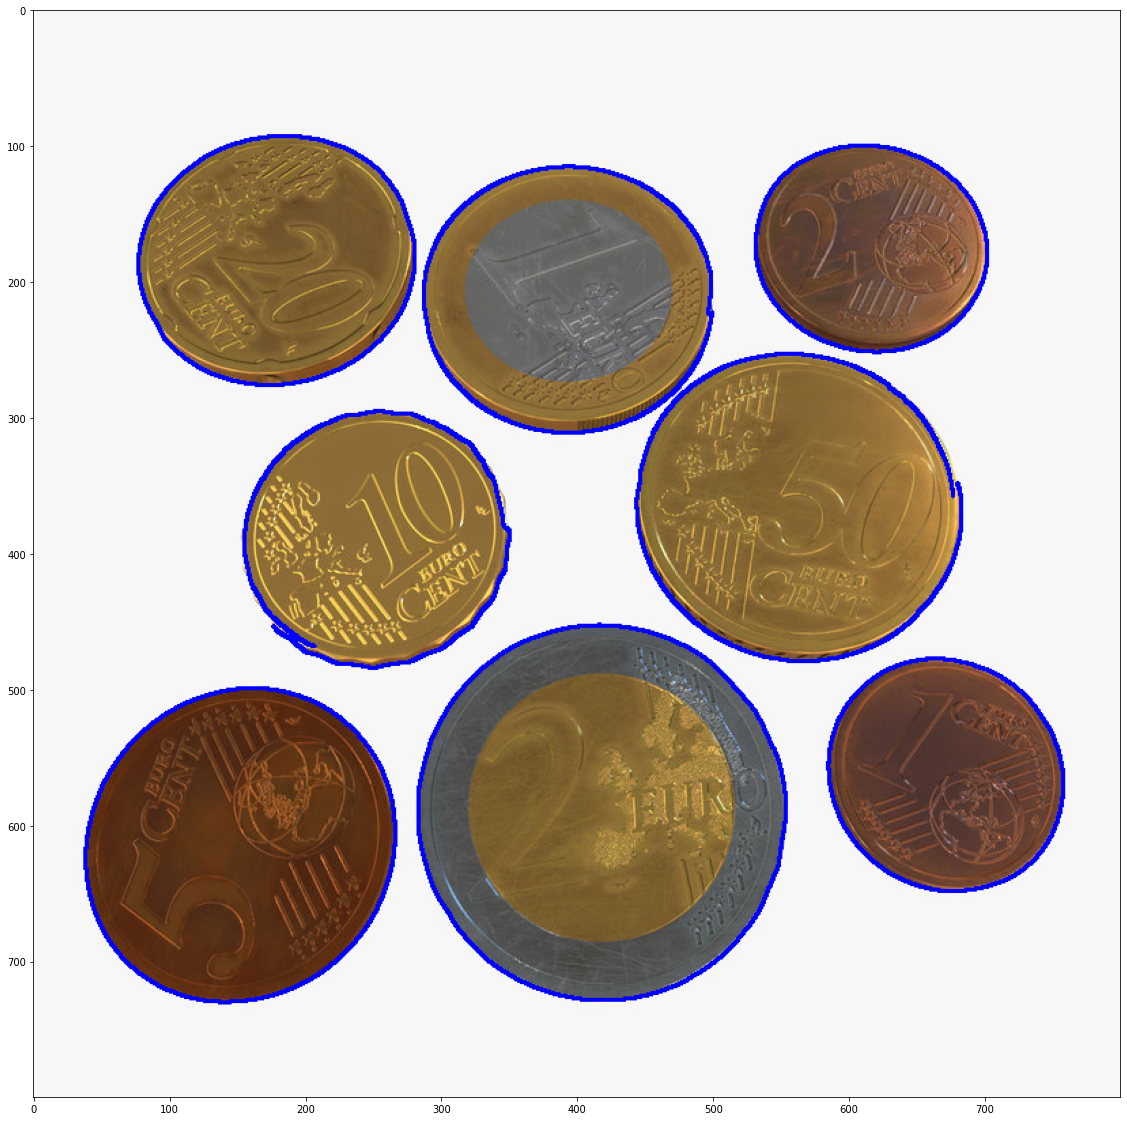

In [272]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

coin_canny_cont, h = cv2.findContours(coin_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


coin_copy_3 = rgb_coins.copy()

cv2.drawContours(coin_copy_3, coin_canny_cont, -1, (0,0,255), 2)

plt.figure(figsize=(20,20))
plt.imshow(coin_copy_3)

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [273]:
# print the number of contours that has been found
print(f'Numbers of contours with threshold: {len(coin_cont)}')
print(f'Numbers of contours with Canny: {len(canny_cont)}')

Numbers of contours with threshold: 21
Numbers of contours with Canny: 8


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [201]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise

cats = cv2.imread('./img/4cats.jpg')
imgshow(cats)

In [225]:
cats_copy = cats.copy()

# convert to grayscale

cats_gray = cv2.cvtColor(cats_copy, cv2.COLOR_BGR2GRAY)
cats_blur = cv2.GaussianBlur(cats_gray, (7,7), 0)

# apply threshold

ret, th = cv2.threshold(cats_gray, 240, 255, cv2.THRESH_BINARY_INV)

plt.imshow(th, cmap='gray')

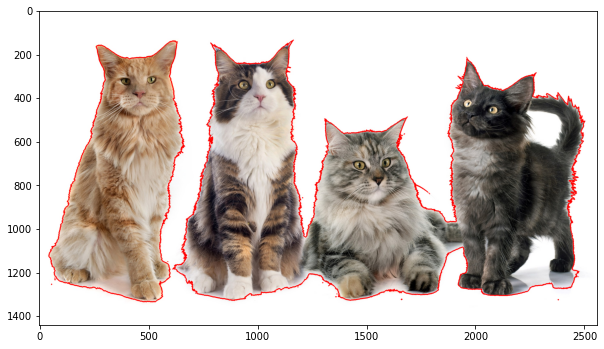

In [249]:
# find contours for the image

cats_cont, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw contours on the copy of the images

cats_copy = cats.copy()
cv2.drawContours(cats_copy, cats_cont, -1, (0,0,255), 3)
imgshow(cats_copy)

In [227]:
print(f'Numbers of contours on cats: {len(cats_cont)}')

Numbers of contours on cats: 130


Numbers of approximate contours on cats: 130


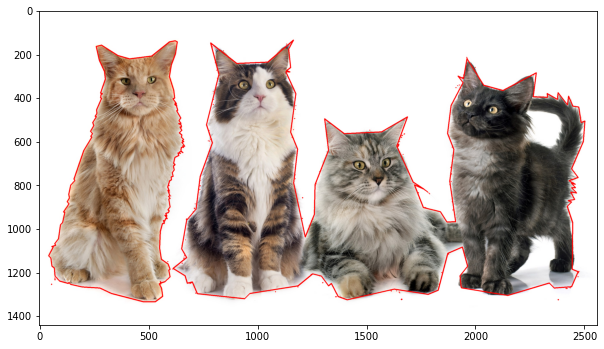

In [264]:
# approximate contour
cats_copy = cats.copy()


accuracy = 0.001
for contour in cats_cont:
    perimeter = cv2.arcLength(contour, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(cats_copy, [approx], 0 ,(0,0,255), 3)
    
imgshow(cats_copy)
print(f'Numbers of approximate contours on cats: {len(cats_cont)}')

## Sorting Contours

### By area

In [10]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [301]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var

coin_cont_list = get_contour_areas(coin_canny_cont)

In [266]:
# Print the contour areas to screen
coin_cont_list

[41181.5, 23144.5, 58493.5, 177.5, 191.0, 162.0, 20341.5, 29253.0]

In [274]:
# Now sort the areas by biggest to smallest and print the sorted areas
coin_contour_sorted = sorted(coin_canny_cont, key = cv2.contourArea ,reverse = True)
coin_contour_sorted

[array([[[416, 452]],
 
        [[415, 453]],
 
        [[414, 453]],
 
        ...,
 
        [[419, 453]],
 
        [[418, 453]],
 
        [[417, 453]]], dtype=int32),
 array([[[150, 499]],
 
        [[149, 500]],
 
        [[148, 500]],
 
        ...,
 
        [[153, 499]],
 
        [[152, 499]],
 
        [[151, 499]]], dtype=int32),
 array([[[173,  93]],
 
        [[172,  94]],
 
        [[171,  94]],
 
        ...,
 
        [[176,  93]],
 
        [[175,  93]],
 
        [[174,  93]]], dtype=int32),
 array([[[657, 477]],
 
        [[656, 478]],
 
        [[655, 478]],
 
        [[654, 478]],
 
        [[653, 478]],
 
        [[652, 478]],
 
        [[651, 478]],
 
        [[650, 478]],
 
        [[649, 479]],
 
        [[648, 479]],
 
        [[647, 479]],
 
        [[646, 479]],
 
        [[645, 479]],
 
        [[644, 480]],
 
        [[643, 480]],
 
        [[642, 480]],
 
        [[641, 480]],
 
        [[640, 481]],
 
        [[639, 481]],
 
        [[638, 481]],
 
    

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [275]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas

coin_contour_sorted_back = sorted(coin_canny_cont, key = cv2.contourArea ,reverse = False)
coin_contour_sorted_back

[array([[[390, 115]],
 
        [[389, 116]],
 
        [[388, 116]],
 
        ...,
 
        [[393, 115]],
 
        [[392, 115]],
 
        [[391, 115]]], dtype=int32),
 array([[[251, 295]],
 
        [[250, 296]],
 
        [[249, 296]],
 
        ...,
 
        [[254, 295]],
 
        [[253, 295]],
 
        [[252, 295]]], dtype=int32),
 array([[[546, 253]],
 
        [[545, 254]],
 
        [[544, 254]],
 
        ...,
 
        [[549, 253]],
 
        [[548, 253]],
 
        [[547, 253]]], dtype=int32),
 array([[[600, 100]],
 
        [[599, 101]],
 
        [[598, 101]],
 
        [[597, 101]],
 
        [[596, 101]],
 
        [[595, 101]],
 
        [[594, 101]],
 
        [[593, 101]],
 
        [[592, 102]],
 
        [[591, 102]],
 
        [[590, 102]],
 
        [[589, 102]],
 
        [[588, 103]],
 
        [[587, 103]],
 
        [[586, 103]],
 
        [[585, 103]],
 
        [[584, 104]],
 
        [[583, 104]],
 
        [[582, 104]],
 
        [[581, 105]],
 
    

In [294]:
# Filter out only the 5 biggest contours and print them
c = coin_contour_sorted[0:5]
len(c)

5

[Hint](# "Just slice the array!") 

In [324]:
# Now in a clean image draw the contours you just filtered out and display it
coins_copy = color_coins.copy()

cv2.drawContours(coins_copy, c, -1, (0,0,0), 3)
imgshow(coins_copy)

In [291]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!

cat_cont_list = get_contour_areas(cats_cont)
cat_contour_sorted = sorted(cats_cont, key = cv2.contourArea ,reverse = True)
c = cat_contour_sorted[:5]

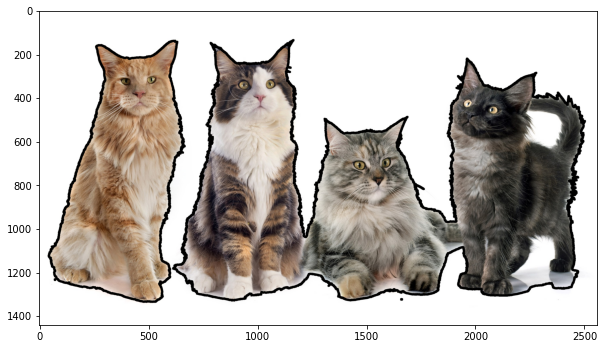

In [292]:
cats_copy = cats.copy()

cv2.drawContours(cats_copy, c,-1, (0,0,0), 10)
imgshow(cats_copy)

### By X coordinate (left to right)

In [299]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [319]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right

coin_x_sorted = sorted(coin_canny_cont, key = get_contour_x_center_coordinate ,reverse = False)


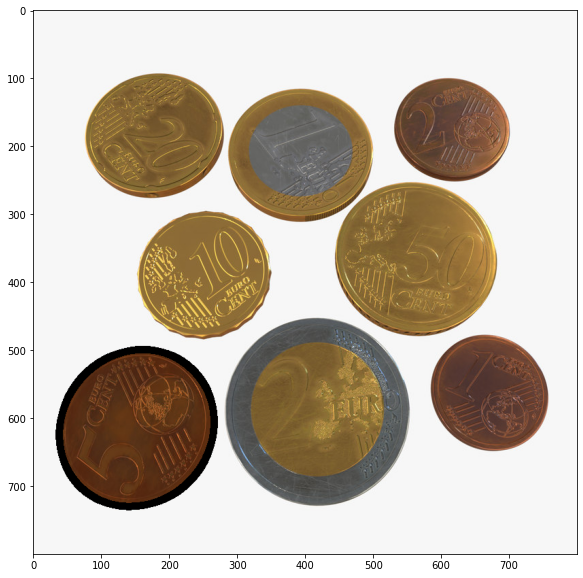

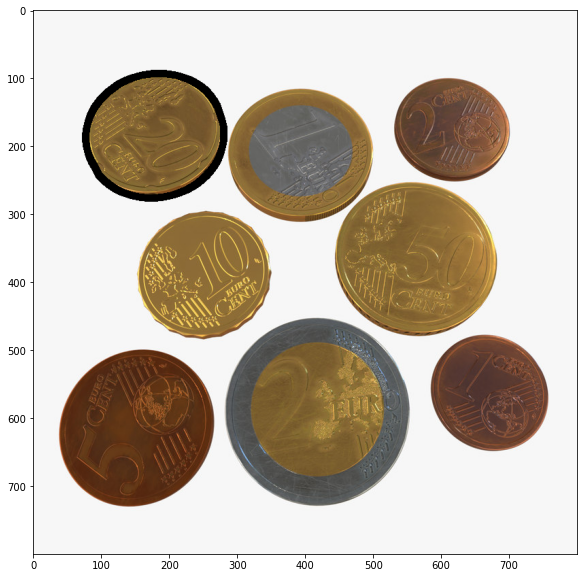

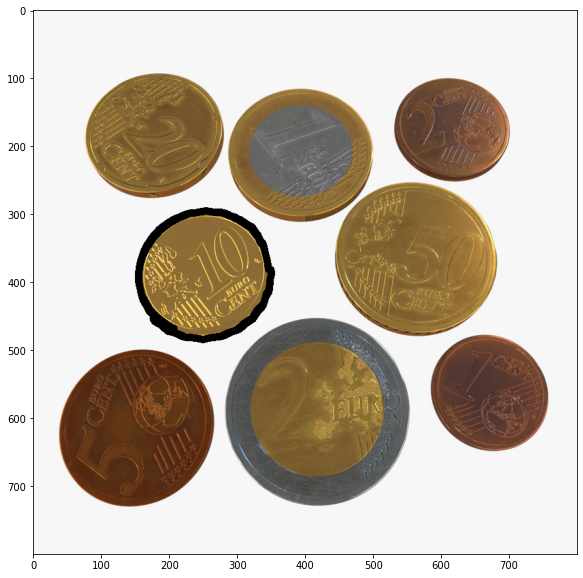

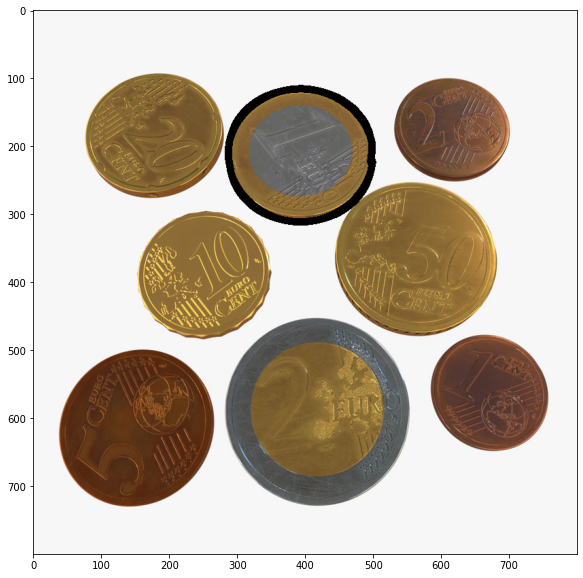

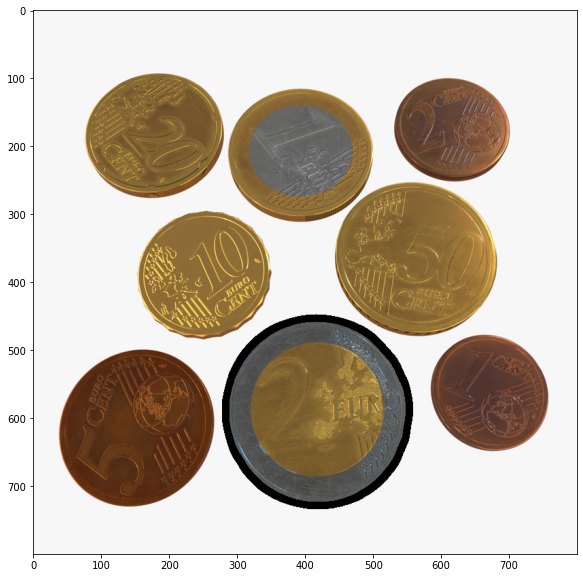

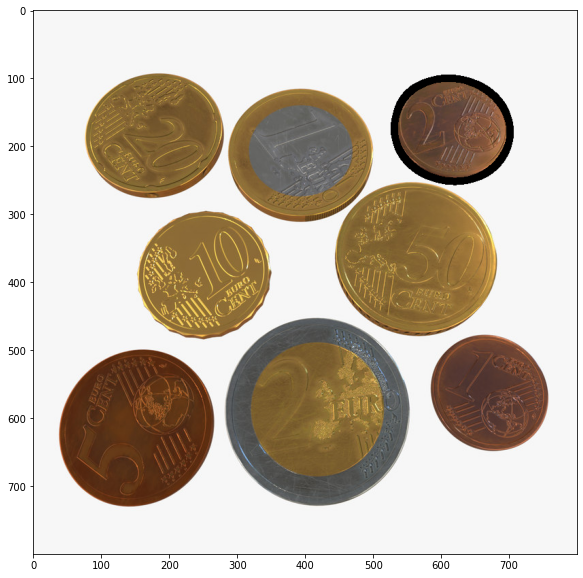

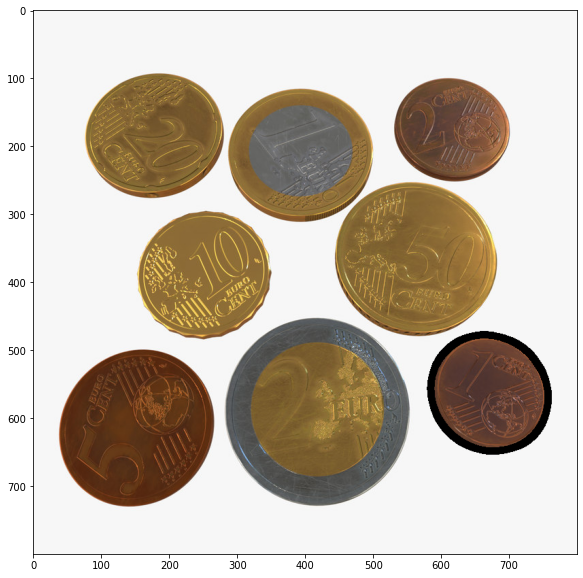

In [326]:
# Draw the contours one at a time and display the images on screen 

coins_copy = color_coins.copy()



for i in range(0, 8):
    cv2.drawContours(coins_copy, coin_x_sorted, i, (0,0,0), 10)
    imgshow(coins_copy)
    coins_copy = color_coins.copy()

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

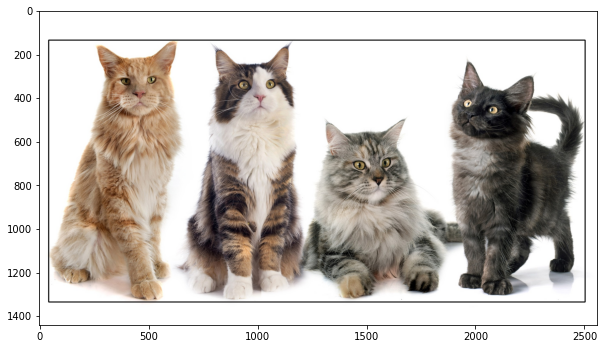

In [329]:
# Can you think of other ways to sort contours?

